In [27]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches


In [29]:
file_path = r"C:\Users\nawri\OneDrive\Desktop\Summer-Olympic-medals-1976-to-2008.csv"

In [31]:
try:
    data = pd.read_csv(file_path, encoding='latin1')
except UnicodeDecodeError:
    print("Failed to read with 'latin1' encoding. Trying 'iso-8859-1'.")
    try:
        data = pd.read_csv(file_path, encoding='iso-8859-1')
    except UnicodeDecodeError:
        print("Failed to read with 'iso-8859-1' encoding. Trying 'cp1252'.")
        try:
            data = pd.read_csv(file_path, encoding='cp1252')
        except UnicodeDecodeError:
            print("Failed to read with 'cp1252' encoding. Please check the file encoding.")

data.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [33]:
# Calculate the number of unique female athletes per year
female_athletes_per_year = data.groupby('Year')['Athlete'].nunique().reset_index()

# Rename columns for clarity
female_athletes_per_year.columns = ['Year', 'Number of Female Athletes']

In [35]:
female_athletes_per_year

,Year,Number of Female Athletes
0,1976.0,1179
1,1980.0,1257
2,1984.0,1309
3,1988.0,1371
4,1992.0,1537
5,1996.0,1709
6,2000.0,1849
7,2004.0,1832
8,2008.0,1866


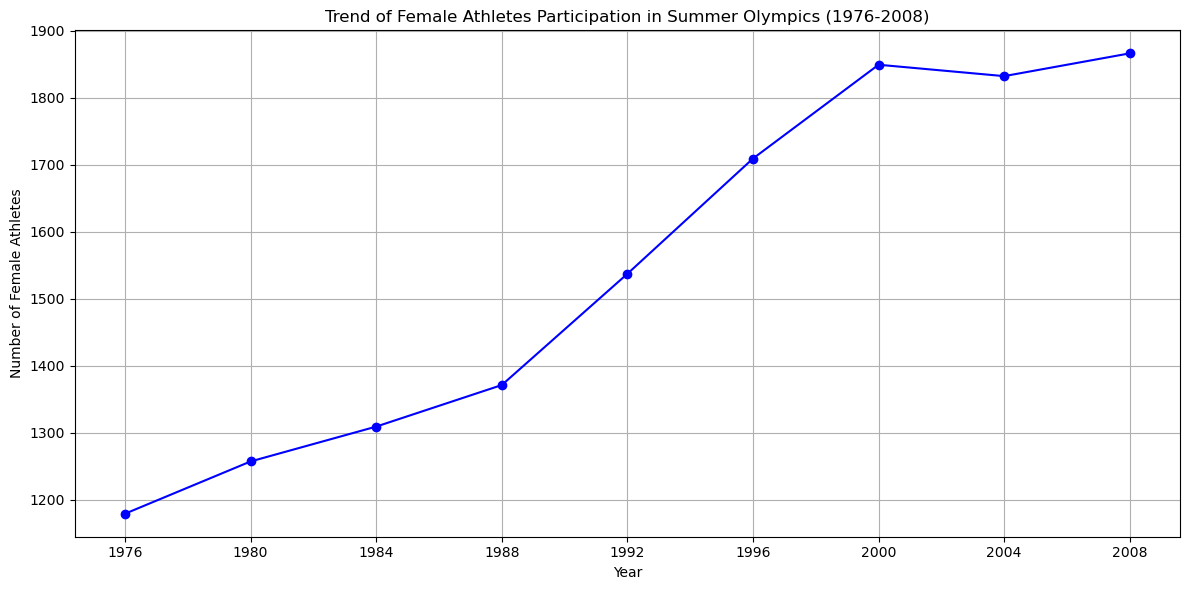

In [37]:
# Plotting the trend
plt.figure(figsize=(12, 6))
plt.plot(
    female_athletes_per_year['Year'],
    female_athletes_per_year['Number of Female Athletes'],
    marker='o',
    linestyle='-',
    color='b'
)
plt.title('Trend of Female Athletes Participation in Summer Olympics (1976-2008)')
plt.xlabel('Year')
plt.ylabel('Number of Female Athletes')
plt.xticks(female_athletes_per_year['Year'])
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
# Filter the data for female athletes
female_athletes_df = data[data['Gender'] == 'Women']

# Group the data by Year and Sport and count unique athletes
female_athletes_by_sport = (
    female_athletes_df.groupby(['Year', 'Sport'])['Athlete']
    .nunique()
    .reset_index()
)

# Rename columns for clarity
female_athletes_by_sport.columns = ['Year', 'Sport', 'Number of Female Athletes']

In [41]:
female_athletes_by_sport

,Year,Sport,Number of Female Athletes
0,1976.0,Aquatics,38
1,1976.0,Archery,3
2,1976.0,Athletics,51
3,1976.0,Basketball,36
4,1976.0,Canoe / Kayak,7
...,...,...,...
167,2008.0,Tennis,9
168,2008.0,Triathlon,3
169,2008.0,Volleyball,42
170,2008.0,Weightlifting,21


<Figure size 1400x800 with 0 Axes>

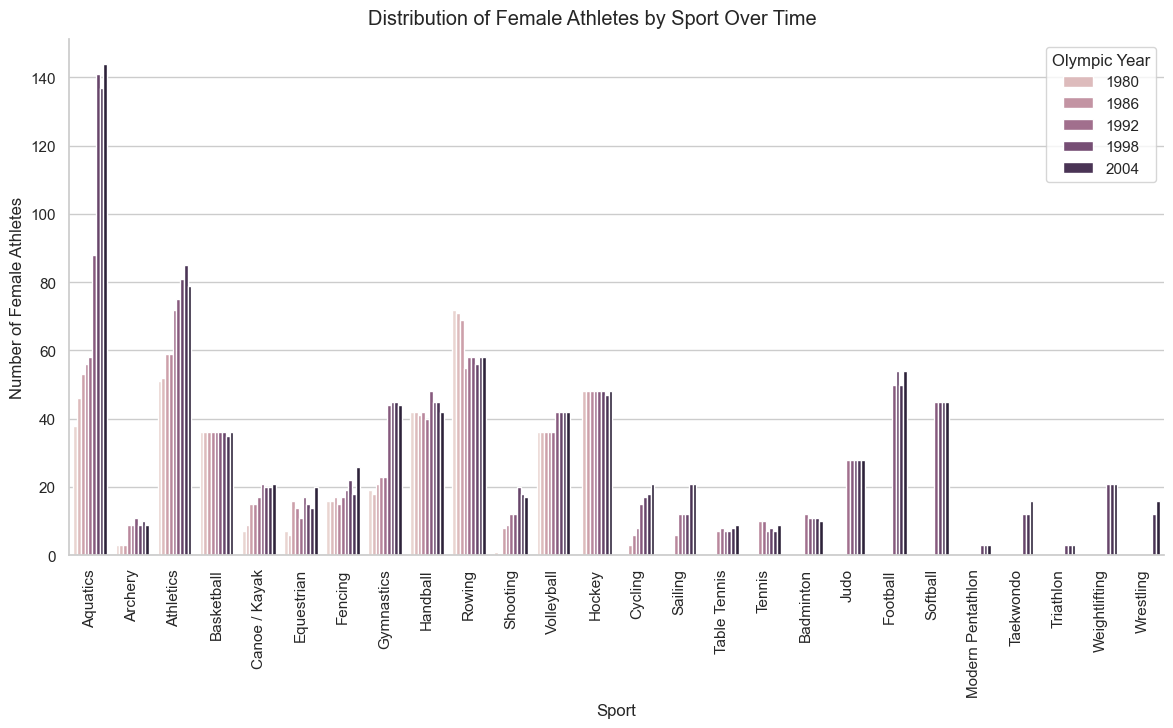

In [43]:
# Plotting the distribution over time for selected years
plt.figure(figsize=(14, 8))

# Using seaborn to create a bar plot
sns.set(style="whitegrid")
g = sns.catplot(
    data=female_athletes_by_sport,
    x='Sport',
    y='Number of Female Athletes',
    hue='Year',
    kind='bar',
    height=6,
    aspect=2,
    legend_out=False
)

# Rotate x labels for better readability
g.set_xticklabels(rotation=90)
g.fig.suptitle('Distribution of Female Athletes by Sport Over Time', y=1.02)
g.set_axis_labels('Sport', 'Number of Female Athletes')
g.add_legend(title='Olympic Year')

# Show the plot
plt.show()

In [44]:
# Filter the data for female athletes
female_medals_df = data[data['Gender'] == 'Women']

# Group the data by Year and Medal type and count medals
medals_by_year = (
    female_medals_df.groupby(['Year', 'Medal'])['Athlete']
    .count()
    .unstack(fill_value=0)
    .reset_index()
)

# Rename columns for clarity
medals_by_year.columns = ['Year', 'Bronze', 'Gold', 'Silver']

In [45]:
medals_by_year

,Year,Bronze,Gold,Silver
0,1976.0,126,127,128
1,1980.0,144,143,142
2,1984.0,162,163,161
3,1988.0,183,172,180
4,1992.0,205,200,195
5,1996.0,260,259,258
6,2000.0,299,293,297
7,2004.0,303,298,298
8,2008.0,319,307,306


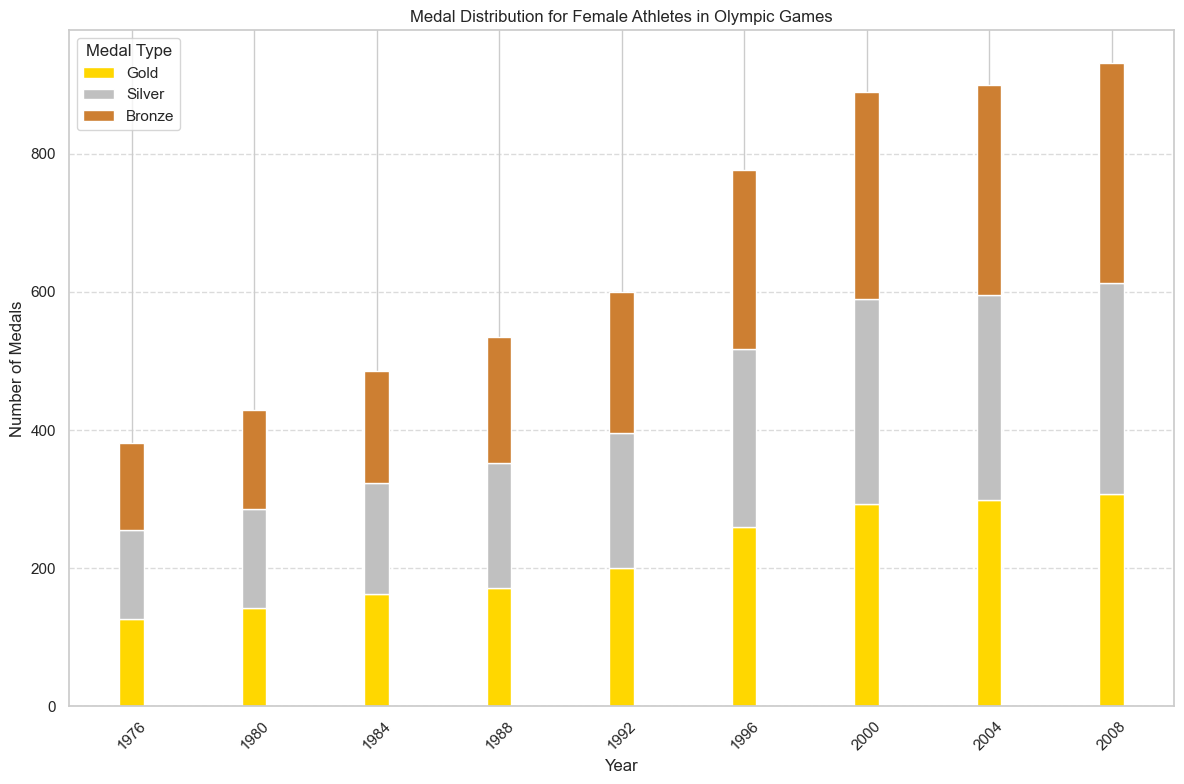

In [46]:
# Plotting the medal distribution over time
plt.figure(figsize=(12, 8))

# Stacked bar plot
plt.bar(medals_by_year['Year'], medals_by_year['Gold'], color='gold', label='Gold')
plt.bar(medals_by_year['Year'], medals_by_year['Silver'], bottom=medals_by_year['Gold'], color='silver', label='Silver')
plt.bar(medals_by_year['Year'], medals_by_year['Bronze'], bottom=medals_by_year['Gold'] + medals_by_year['Silver'], color='#cd7f32', label='Bronze')

# Adding title and labels
plt.title('Medal Distribution for Female Athletes in Olympic Games')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.xticks(medals_by_year['Year'], rotation=45)
plt.legend(title='Medal Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [47]:
# Filter the data for female athletes in Summer Olympics
female_athletes_df = data[(data['Gender'] == 'Women')]

# Group the data by Country and Year and count unique athletes
female_athletes_by_country = (
    female_athletes_df.groupby(['Country', 'Year'])['Athlete']
    .nunique()
    .reset_index()
)

# Rename columns for clarity
female_athletes_by_country.columns = ['Country', 'Year', 'Number of Female Athletes']

# Find the top countries with the highest number of female athletes
top_countries = (
    female_athletes_by_country.groupby('Country')['Number of Female Athletes']
    .sum()
    .nlargest(10)
    .index
)

# Filter the data to include only the top countries
top_countries_data = female_athletes_by_country[female_athletes_by_country['Country'].isin(top_countries)]
top_countries_data

,Country,Year,Number of Female Athletes
7,Australia,1980.0,1
8,Australia,1984.0,11
9,Australia,1988.0,21
10,Australia,1992.0,10
11,Australia,1996.0,68
...,...,...,...
323,United States,1992.0,79
324,United States,1996.0,109
325,United States,2000.0,115
326,United States,2004.0,126


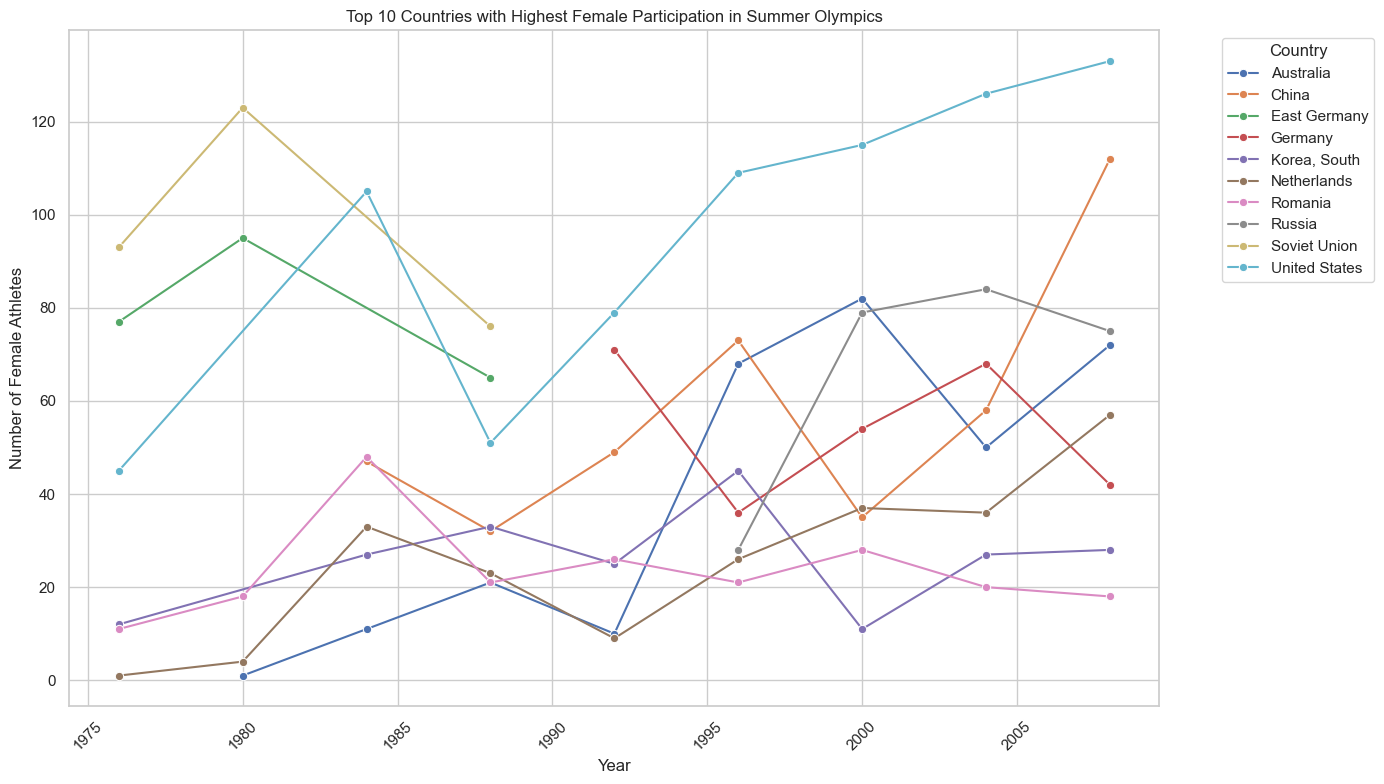

In [61]:
# Plotting the participation over time for top countries
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Using seaborn to create a line plot
sns.lineplot(
    data=top_countries_data,
    x='Year',
    y='Number of Female Athletes',
    hue='Country',
    marker='o'
)

# Adding title and labels
plt.title('Top 10 Countries with Highest Female Participation in Summer Olympics')
plt.xlabel('Year')
plt.ylabel('Number of Female Athletes')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

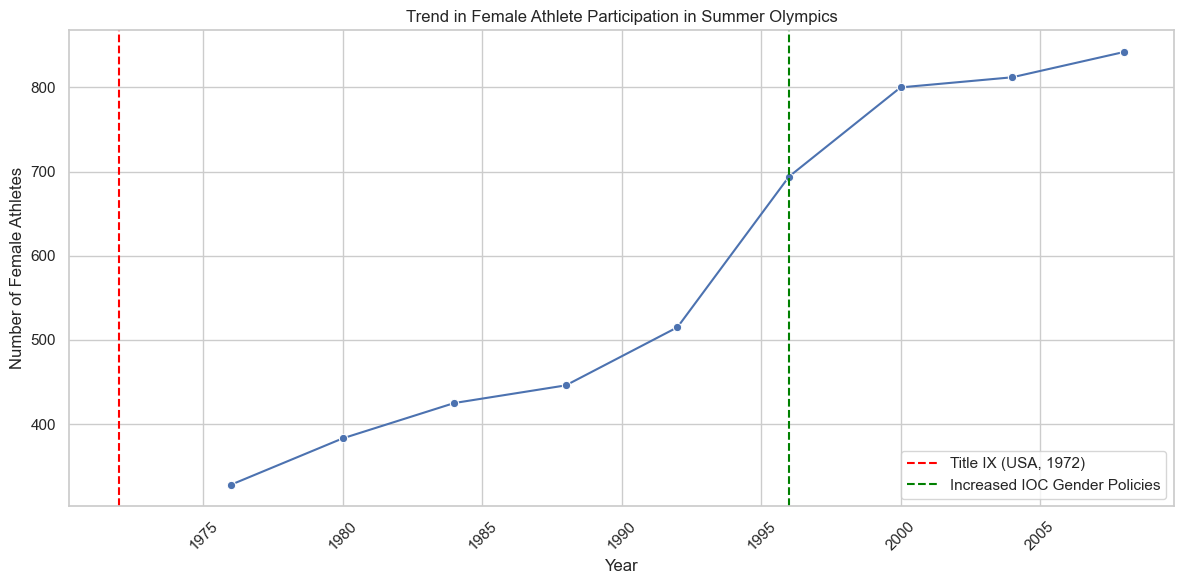

In [55]:
# Group the data by Year and count unique athletes
female_athletes_by_year = (
    female_athletes_df.groupby('Year')['Athlete']
    .nunique()
    .reset_index()
)

# Rename columns for clarity
female_athletes_by_year.columns = ['Year', 'Number of Female Athletes']

# Plotting the overall trend in female participation over time
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Using seaborn to create a line plot
sns.lineplot(
    data=female_athletes_by_year,
    x='Year',
    y='Number of Female Athletes',
    marker='o'
)

# Highlighting key policy changes
plt.axvline(x=1972, color='red', linestyle='--', label='Title IX (USA, 1972)')
plt.axvline(x=1996, color='green', linestyle='--', label='Increased IOC Gender Policies')

# Adding title and labels
plt.title('Trend in Female Athlete Participation in Summer Olympics')
plt.xlabel('Year')
plt.ylabel('Number of Female Athletes')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()